In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\ASUS\\Sales_Prediction\\notebooks'

In [3]:
train_df = pd.read_csv(r"C:\Users\ASUS\.cookiecutters\cookiecutter-data-science\Sales_Prediction\data\interim\train_final.csv")
train_df.info()
train_df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412619 entries, 0 to 2412618
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   date                object 
 2   date_block_num      int64  
 3   shop_id             int64  
 4   item_id             int64  
 5   item_price          float64
 6   item_cnt_day        float64
 7   shop_name           object 
 8   item_category_name  object 
 9   item_category_id    int64  
 10  item_name           object 
dtypes: float64(2), int64(5), object(4)
memory usage: 202.5+ MB


False

In [4]:
train_df.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
0,0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
1,1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
2,2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
3,3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
4,4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)


In [5]:
pd.to_datetime(train_df['date'])

0         2013-02-01
1         2013-02-01
2         2013-03-01
3         2013-01-20
4         2013-01-23
             ...    
2412614   2015-02-10
2412615   2015-04-10
2412616   2015-03-10
2412617   2015-01-10
2412618   2015-03-10
Name: date, Length: 2412619, dtype: datetime64[ns]

In [6]:
from sklearn.preprocessing import LabelEncoder
train_df.shop_name = LabelEncoder().fit_transform(train_df.shop_name)
train_df.item_category_name = LabelEncoder().fit_transform(train_df.item_category_name)
train_df.item_name = LabelEncoder().fit_transform(train_df.item_name)
train_df.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
0,0,02.01.2013,0,59,22154,999.0,1.0,59,36,37,20713
1,1,02.01.2013,0,25,22154,999.0,1.0,25,36,37,20713
2,2,03.01.2013,0,25,22154,999.0,1.0,25,36,37,20713
3,3,20.01.2013,0,25,22154,999.0,1.0,25,36,37,20713
4,4,23.01.2013,0,25,22154,999.0,1.0,25,36,37,20713


In [7]:
train_df["shop_name"].nunique()

60

In [8]:
## Grouping data on the basis of shop name to see per month sale of that shop
shop_month_sales = train_df.groupby(['date_block_num','shop_name'], as_index=False)['item_cnt_day'].count()
shop_month_sales.to_csv(r'C:\Users\ASUS\.cookiecutters\cookiecutter-data-science\Sales_Prediction\data\interim\shop_month_sales.csv')
shop_month_sales

,date_block_num,shop_name,item_cnt_day
0,0,0,4128
1,0,1,2460
2,0,2,925
3,0,3,698
4,0,4,1651
...,...,...,...
1577,33,55,1006
1578,33,56,960
1579,33,57,1729
1580,33,58,1092


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'item_cnt_day')

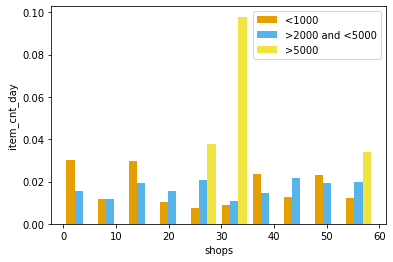

In [9]:
x1 = list(shop_month_sales [shop_month_sales ['item_cnt_day'] < 1000]['shop_name'])
x2 = list(shop_month_sales [shop_month_sales ['item_cnt_day'] > 2000]['shop_name']) and list(shop_month_sales [shop_month_sales ['item_cnt_day'] < 5000]['shop_name'])
x3 = list(shop_month_sales [shop_month_sales ['item_cnt_day'] > 5000]['shop_name'])
colors = ['#E69F00', '#56B4E9','#F0E442']
names = ['<1000', '>2000 and <5000','>5000']
plt.hist([x1,x2,x3], bins = int(10), normed=True,color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('shops')
plt.ylabel('item_cnt_day')

In [10]:
arr =[0,1,2,3,4,5,6,7,8,9,10,11,12]
g1 = shop_month_sales.query("item_cnt_day <= 1000 and date_block_num == 0")['item_cnt_day'].mean()
g2 = shop_month_sales.query("item_cnt_day <= 1000 and date_block_num == 1")['item_cnt_day'].mean()
g3 = shop_month_sales.query("item_cnt_day <= 1000 and date_block_num == 2")['item_cnt_day'].mean()

In [11]:
print(g1)
print(g2)
print(g3)

734.75
696.6666666666666
725.6


In [12]:
g1 = shop_month_sales[shop_month_sales['item_cnt_day'] < 1500]
g2 = shop_month_sales[(shop_month_sales['item_cnt_day'] > 1500) & (shop_month_sales['item_cnt_day'] < 3000) ]
g3 = shop_month_sales[(shop_month_sales['item_cnt_day'] > 3300) & (shop_month_sales['item_cnt_day'] < 5000)]
g4 = shop_month_sales[shop_month_sales['item_cnt_day'] > 5000]
print(g1)
print(g2)
print(g3)
print(g4)

      date_block_num  shop_name  item_cnt_day
2                  0          2           925
3                  0          3           698
7                  0          8          1270
8                  0         10           803
9                  0         12           513
...              ...        ...           ...
1576              33         53           766
1577              33         55          1006
1578              33         56           960
1580              33         58          1092
1581              33         59           598

[1050 rows x 3 columns]
      date_block_num  shop_name  item_cnt_day
1                  0          1          2460
4                  0          4          1651
5                  0          6          2770
6                  0          7          1999
12                 0         15          2067
...              ...        ...           ...
1522              32         42          2104
1535              32         57          1637
1558     

In [13]:
g11 = g1.groupby(['date_block_num','shop_name']).aggregate(np.mean)

In [14]:
g1

,date_block_num,shop_name,item_cnt_day
2,0,2,925
3,0,3,698
7,0,8,1270
8,0,10,803
9,0,12,513
...,...,...,...
1576,33,53,766
1577,33,55,1006
1578,33,56,960
1580,33,58,1092


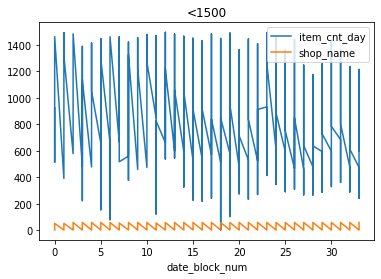

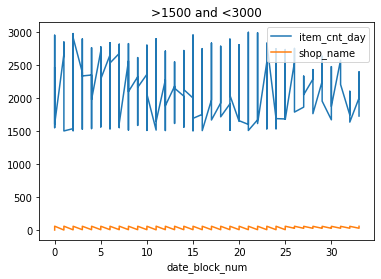

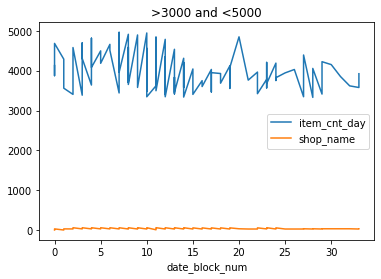

In [16]:
g1.plot(x="date_block_num", y=["item_cnt_day","shop_name"],kind = 'line', title = "<1500")
g2.plot(x="date_block_num", y=["item_cnt_day","shop_name"],kind = 'line',title = ">1500 and <3000")
g3.plot(x="date_block_num", y=["item_cnt_day","shop_name"],kind = 'line', title = ">3000 and <5000")

315

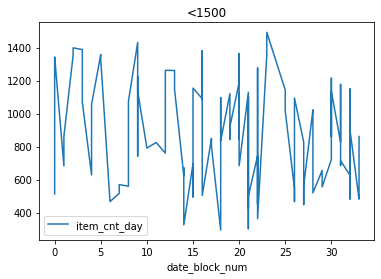

In [17]:
g1_tenth = g1.sample(frac = .1, random_state=np.random.randint(10))
g1_tenth = g1_tenth.sort_values(by=['date_block_num'], ascending=True)
g1_tenth.head()
g1_tenth.plot(x="date_block_num", y=["item_cnt_day"],kind = 'line', title = "<1500")
g1_tenth.size

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date_block_num,shop_name,item_cnt_day,rolling_Mean
2,0,2,925,NaN
3,0,3,698,NaN
7,0,8,1270,NaN
8,0,10,803,NaN
9,0,12,513,NaN
...,...,...,...,...
1576,33,53,766,709.471429
1577,33,55,1006,716.128571
1578,33,56,960,718.971429
1580,33,58,1092,719.714286


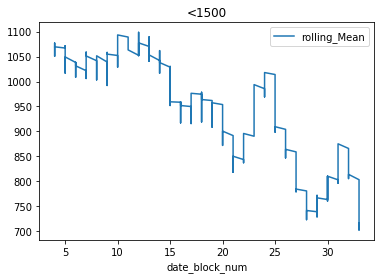

In [18]:
g1['rolling_Mean'] = g1['item_cnt_day'].rolling(window=70).mean()
g1.plot(x="date_block_num", y=["rolling_Mean"],kind = 'line', title = "<1500")
g1

In [19]:
g2_tenth = g2.sample(frac = .1, random_state=np.random.randint(10))
g2_tenth = g2_tenth.sort_values(by=['date_block_num'], ascending=True)
g2_tenth.head()
#shop sales in every month are varying

,date_block_num,shop_name,item_cnt_day
87,1,53,1510
106,2,21,1749
124,2,44,1627
102,2,15,2008
105,2,19,2268


In [20]:
g3_tenth = g3.sample(frac = .1, random_state=np.random.randint(10))
g3_tenth = g3_tenth.sort_values(by=['date_block_num'], ascending=True)
g3_tenth.head()

,date_block_num,shop_name,item_cnt_day
23,0,28,4685
224,4,57,4081
494,10,54,4561
610,13,25,4537
632,13,54,3835


In [ ]:
from tsfresh import extract_features
extracted_features = extract_features(shop_month_sales, column_id="date_block_num", column_sort="date_block_num")